In [3]:
import cobra
import cobra.test
import cometspy as c
import os
os.environ['GUROBI_COMETS_HOME'] = '/opt/gurobi952/linux64'

## Use old models. 

The Harcombe et al. 2014 paper used slightly older models than are available now. These are included in the models folder, and can be read directly as COMETS models.

In [4]:
E = c.model()
E.read_comets_model("./models/jmc_EC_iJO_KO.txt")
S = c.model()
S.read_comets_model("./models/jmc_SalMet.txt")
M = c.model()
M.read_comets_model("./models/jmc_AM1_KO.txt")

# sanity-check simulations

We'll start with well-mixed simulations before doing spatial simulations. No species should grow alone, but they should all grow together. Rerun the next few chunks of code with different initial_pop values to see this. Note that in a community with E and M, M technically increases, but it is marginal. 

In [5]:
E.initial_pop = [0, 0, 1.e-8]
S.initial_pop = [0, 0, 1.e-8]
M.initial_pop = [0, 0, 1.e-8]
E.open_exchanges()
S.open_exchanges()
M.open_exchanges()
E.obj_style = "MAXIMIZE_OBJECTIVE_FLUX"
S.obj_style =  "MAXIMIZE_OBJECTIVE_FLUX"
M.obj_style =  "MAXIMIZE_OBJECTIVE_FLUX"

# make layout

environmental information. 

Note that the media is the 3-species mutualism media. To make the 2-species (E, S) mutualism media, replace mea\[e] with nh4[e]

In [19]:
l = c.layout([E,S, M])
base_nutrients = ["ca2[e]", "cl[e]", "cobalt2[e]", "cu2[e]","fe2[e]", "fe3[e]", "k[e]","mg2[e]",
                  "mn2[e]", "mobd[e]", "ni2[e]", "o2[e]", "pi[e]", "so4[e]", "zn2[e]"]
for nutrient in base_nutrients:
    l.set_specific_metabolite(nutrient, 1000)
l.set_specific_metabolite("lcts[e]", 0.000278)
l.set_specific_metabolite("mea[e]", 0.0015)

# make parameters

mathematical parameters and datasaving parameters

In [20]:
p = c.params()
p.set_param("defaultKm", 0.00001) # M 
p.set_param("defaultVmax", 10) #mmol/gDw/hr
p.set_param("maxCycles", 200)
p.set_param("timeStep", 1)

In [21]:
sim = c.comets(l, p)
sim.run()


Running COMETS simulation ...
Done!


<AxesSubplot:xlabel='cycle'>

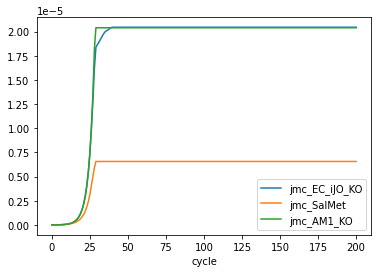

In [22]:
sim.total_biomass.plot(x = "cycle")

# Now remake the layout spatially. 

Note: if you want this to be exactly reproducible, set a seed.

Note: the 3-species simulations used a 15x15 lattice grid, which is done below. The two-species simulations used a 25x25 lattice grid. See the paper for more details.

In addition, for this demo, I'm only running 10 cycles, which should obviously be increased to reach saturation.

In [23]:
from cometspy import utils

In [24]:
E_locs = utils.pick_random_locations(n = 16, xrange = [0,15], yrange = [0,15])
S_locs = utils.pick_random_locations(n = 1, xrange = [0,15], yrange = [0,15])
M_locs = utils.pick_random_locations(n = 83, xrange = [0,15], yrange = [0,15])

E.initial_pop = [[xy[0], xy[1], 3.e-7] for xy in E_locs]
S.initial_pop = [[xy[0], xy[1], 3.e-7] for xy in S_locs]
M.initial_pop = [[xy[0], xy[1], 3.e-7] for xy in M_locs]

# for example...
E.initial_pop

[[9, 0, 3e-07],
 [14, 10, 3e-07],
 [9, 9, 3e-07],
 [0, 9, 3e-07],
 [13, 0, 3e-07],
 [4, 11, 3e-07],
 [5, 1, 3e-07],
 [1, 10, 3e-07],
 [12, 0, 3e-07],
 [12, 10, 3e-07],
 [3, 3, 3e-07],
 [14, 12, 3e-07],
 [4, 1, 3e-07],
 [13, 2, 3e-07],
 [9, 1, 3e-07],
 [5, 7, 3e-07]]

In [25]:
l = c.layout([E,S,M])
l.grid = [15, 15]
for nutrient in base_nutrients:
    l.set_specific_metabolite(nutrient, 1000)
l.set_specific_metabolite("lcts[e]", 0.000278)
l.set_specific_metabolite("mea[e]", 0.0015)

In [30]:
p = c.params()
p.set_param("defaultKm", 0.00001) # M 
p.set_param("defaultVmax", 10) #mmol/gDw/hr
p.set_param("maxCycles", 96)
p.set_param("timeStep", 1) #hr

p.set_param("spaceWidth", 0.05) #cm
p.set_param("defaultDiffConst", 5.e-6) #cm2/s; metabolites
p.set_param("flowDiffRate", 3.e-9) #cm2/s; biomass

# Note: I set the time step to 1 hour, and 96 cycles. This can take awhile on a laptop (30 min or so). In the actual paper, the time step was 0.1 hours, and therefore 960 cycles were used. This will take much longer.


Running COMETS simulation ...
Done!


<AxesSubplot:xlabel='cycle'>

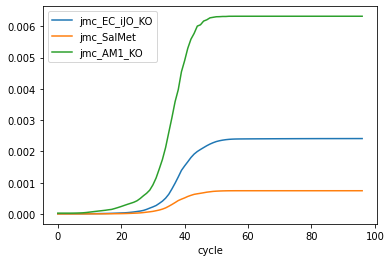

In [31]:
sim = c.comets(l, p)
sim.run()
sim.total_biomass.plot(x = "cycle")

At this point, if you wished to do transfers like in the paper, repeat the simulation but with different values for n in pick_random_locations, which are based on the final frequency obtainable from total_biomass.

In [80]:
sim.total_biomass

,cycle,jmc_EC_iJO_KO,jmc_SalMet,jmc_AM1_KO
0,0,0.000005,3.000000e-07,0.000025
1,1,0.000005,2.999669e-07,0.000025
2,2,0.000005,3.002711e-07,0.000025
3,3,0.000005,3.042804e-07,0.000025
4,4,0.000005,3.178171e-07,0.000026
...,...,...,...,...
92,92,0.002805,8.703458e-04,0.006373
93,93,0.002805,8.703457e-04,0.006373
94,94,0.002805,8.703457e-04,0.006373
95,95,0.002805,8.703456e-04,0.006373
